In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


전처리 코드 자동 실행

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
500번 인덱스가 데이터 범위를 벗어났습니다.
CSS가 적용된 HTML 콘텐츠:
<div aria-label="12 of 54" aria-roledescription="slide" class="swiper-slide slide-12" data-swiper-slide-index="11" data-v-4b520e00="" role="group" style='width: 550px; margin-right: 40px;-webkit-border-horizontal-spacing: 0px; -webkit-border-image: none; -webkit-border-vertical-spacing: 0px; -webkit-box-align: stretch; -webkit-box-decoration-break: slice; -webkit-box-direction: normal; -webkit-box-flex: 0; -webkit-box-ordinal-group: 1; -webkit-box-orient: horizontal; -webkit-box-pack: start; -webkit-box-reflect: none; -webkit-font-smoothing: auto; -webkit-line-break: auto; -webkit-line-clamp: none; -webkit-locale: "ko"; -webkit-mask-box-image: none; -webkit-mask-box-image-outset: 0; -webk

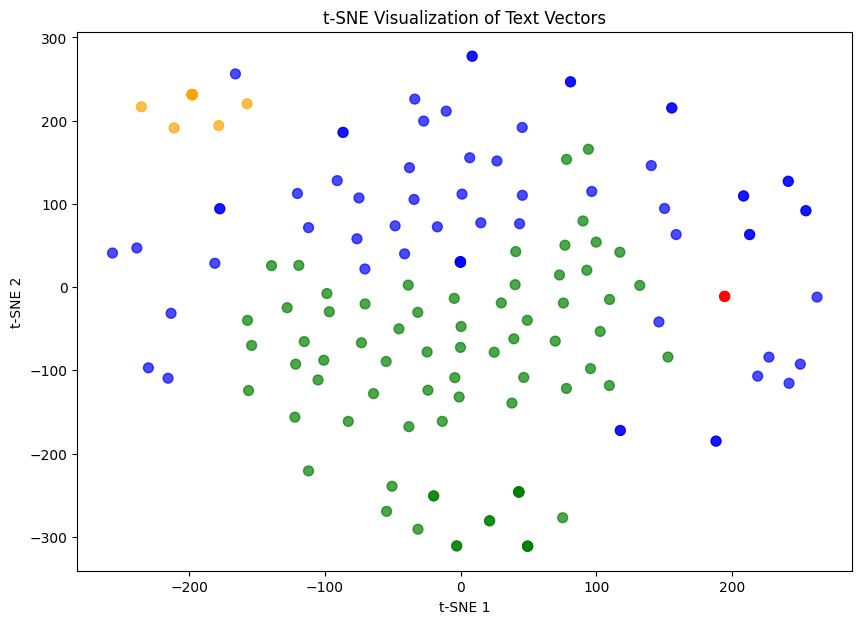

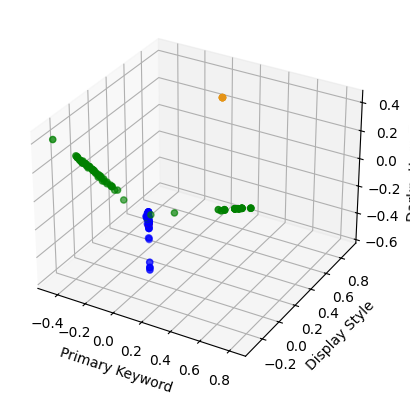

학습 데이터 - 다크패턴 여부가 'X'인 데이터의 수: 68
학습 데이터 - 다크패턴 여부가 'O'인 데이터의 수: 91
학습 데이터 - 압박형 데이터의 수: 3
학습 데이터 - 방해형 데이터의 수: 76
학습 데이터 - 오도형 데이터의 수: 12


NameError: name 'df' is not defined

In [ ]:
import nbformat
from google.colab import files
from google.colab.output import eval_js
from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell

# .ipynb 파일 경로
notebook_path = '/content/drive/MyDrive/전처리ver6.0.ipynb'

# .ipynb 파일 읽기
with open(notebook_path) as f:
    notebook = nbformat.read(f, as_version=4)

# 셀 단위로 실행
shell = InteractiveShell.instance()
for cell in notebook.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)


In [ ]:
display(df_train)

,다크패턴 여부,type,추출한 텍스트,HTML+CSS,Static HTML 일치도
0,X,,"쿠팡 랭킹순은 판매 실적, 고객 선호도, 상품 경쟁력 및검색 정확도 등을 종합적으로...","<div id=""help-coupang-ranking-search-sort""><sp...",0
1,X,,네일팁/페디팁/스티커 일반네일 젤네일 케어/영양/리무버 네일케어도구 네일아트소품/도...,"<div class=""third-depth-list"" style='-webkit-b...",0
2,X,,총 수량 16개 이하 16~32개 32~50개 50~100개 100~200개 200...,"<div class=""search-filter-options search-attr_...",0
3,X,,무료배송 (한정)빙그레 바나나 우유 미니 120ml x 24개 코스트코 바나나맛 음...,"<div class=""descriptions-inner"" style='-webkit...",0
4,X,,쿠팡플레이 로켓배송 로켓프레시 쿠팡비즈 로켓직구 골드박스 판매자특가 와우회원할인 이...,"<div class=""gnb-menu-container"" id=""gnb-menu-c...",0
...,...,...,...,...,...
154,O,방해형,"성인/KB국민카드(이용실적 충족시)왕복 1,135,700원~","<div class=""item_defaultSummary__iVehV"" itemsc...",0
155,O,방해형,"성인/KB국민카드(이용실적 충족시)왕복 1,161,200원~","<div class=""item_defaultSummary__iVehV"" itemsc...",0
156,O,방해형,"성인/KB국민카드(이용실적 충족시)왕복 1,166,900원~","<div class=""item_defaultSummary__iVehV"" itemsc...",0
157,O,방해형,"성인/신한카드왕복 1,236,400원~","<div class=""item_defaultSummary__iVehV"" itemsc...",0


In [ ]:
!pip install datasets

# BERT 기계학습 (다중 분류, static 코드, test 데이터 분리, 토큰화 데이터 저장)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer
from datasets import Dataset
from sklearn.metrics import classification_report, accuracy_score, f1_score
from transformers import Trainer, TrainingArguments, BertForSequenceClassification
from transformers import AutoModel, AutoTokenizer
import numpy as np

# 데이터 전처리 함수
def preprocess_data(df):
    # HTML+CSS 텍스트화
    df['HTML_CSS'] = df['HTML+CSS'].apply(lambda x: x if isinstance(x, str) else "")

    # 라벨 매핑
    label_mapping = {'오도형': 1, '방해형': 2, '압박형': 3}
    default_label = 0  # 기본값 (미지정 상태)

    df['label'] = df['type'].map(label_mapping).fillna(default_label).astype(int)


    df['HTML_text'] = df['추출한 텍스트']

    df['HTML_match'] = df['Static HTML 일치도']

    return df[['HTML_CSS', 'HTML_text', 'HTML_match', 'label']]

# 모델과 토크나이저 로드
model_name = "skt/kobert-base-v1"
model = AutoModel.from_pretrained(model_name)

tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")


In [ ]:
# 토큰화 함수 정의 (HTML_CSS만 사용)
def tokenize_html_css(examples):
    return tokenizer(examples['HTML_CSS'], padding='max_length', truncation=True, max_length=255)

# 토큰화 함수 정의 (HTML_text만 사용)
def tokenize_html_text(examples):
    return tokenizer(examples['HTML_text'], padding='max_length', truncation=True, max_length=255)

# 학습 데이터 전처리
df_train_processed = preprocess_data(df_train)
train_data = Dataset.from_pandas(df_train_processed[['HTML_CSS', 'HTML_text', 'HTML_match', 'label']])

# # 테스트 데이터 전처리
# df_test_processed = preprocess_data(df_test)
# test_data = Dataset.from_pandas(df_test_processed[['HTML_CSS', 'HTML_text', 'HTML_match', 'label']])


In [ ]:
from sklearn.model_selection import train_test_split


# 데이터셋 분할 (예: 80% 훈련, 20% 테스트)
train_df, test_df = train_test_split(df_train_processed, test_size=0.2, random_state=42, stratify=df_train_processed['label'])

# Huggingface Dataset 형식으로 변환
train_data = Dataset.from_pandas(train_df[['HTML_CSS', 'HTML_text', 'HTML_match', 'label']])
test_data = Dataset.from_pandas(test_df[['HTML_CSS', 'HTML_text', 'HTML_match', 'label']])

아래 코드는 단순히 확안용

In [ ]:
# 학습 데이터에서 'label' 컬럼의 분포 확인
train_df = train_data.to_pandas()  # Dataset을 pandas DataFrame으로 변환
train_label_counts = train_df['label'].value_counts()
print("Train data label distribution:")
print(train_label_counts)

# 테스트 데이터에서 'label' 컬럼의 분포 확인
test_df = test_data.to_pandas()  # Dataset을 pandas DataFrame으로 변환
test_label_counts = test_df['label'].value_counts()
print("Test data label distribution:")
print(test_label_counts)


Train data label distribution:
label
2    61
0    54
1    10
3     2
Name: count, dtype: int64
Test data label distribution:
label
2    15
0    14
1     2
3     1
Name: count, dtype: int64


In [ ]:
# 토큰화 함수 적용
train_data_html_css = train_data.map(tokenize_html_css, batched=True, num_proc=4)

In [ ]:
test_data_html_css = test_data.map(tokenize_html_css, batched=True, num_proc=1)

Map:   0%|          | 0/157 [00:00<?, ? examples/s]

In [ ]:
train_data_html_text = train_data.map(tokenize_html_text, batched=True, num_proc=4)

In [ ]:
test_data_html_text = test_data.map(tokenize_html_text, batched=True, num_proc=4)

Map (num_proc=4):   0%|          | 0/157 [00:00<?, ? examples/s]

In [ ]:
# [SEP] 토큰의 ID를 가져오기
sep_token_id = tokenizer.sep_token_id

# 데이터셋 결합 함수 정의
def combine_datasets(dataset1, dataset2):
    # 'input_ids'와 'attention_mask'를 합치기
    combined_input_ids = [d1 + [sep_token_id] + d2 for d1, d2 in zip(dataset1['input_ids'], dataset2['input_ids'])]
    combined_attention_mask = [m1 + [sep_token_id] + m2 for m1, m2 in zip(dataset1['attention_mask'], dataset2['attention_mask'])]

    combined_html_match = dataset1['HTML_match']

    combined_dataset = {
        'input_ids': combined_input_ids,
        'attention_mask': combined_attention_mask,
        'HTML_match': combined_html_match,
        'label': dataset1['label'],  # 다중 분류 레이블 그대로 사용
    }

    return Dataset.from_dict(combined_dataset)

# 결합된 학습 및 테스트 데이터 생성
combined_train_data = combine_datasets(train_data_html_css, train_data_html_text)
combined_test_data = combine_datasets(test_data_html_css, test_data_html_text)


# 아래 두 코드는 추가 데이터가 들어올 것 같은때 사용
# 진짜 주의!! 직접 파일명 변경해서 실행할 것!! 아니면 덮여쓰기됨..
토큰화한 데이터를 폴더에 저장하고 새로운 데이터가 들어왔을때 토큰화한 후에 폴더에 저장함, 학습시킬 때는 그 폴더 안에 존재하는 데이터들 합쳐서 사용함


In [ ]:
import os
import json

# JSON 파일 저장 함수 정의
def save_dataset_to_json(dataset, file_path):

    # 폴더가 없으면 생성
    folder_path = os.path.dirname(file_path)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    # Dataset 객체를 딕셔너리로 변환
    dataset_dict = dataset.to_dict()

    # JSON 파일로 저장
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(dataset_dict, f, ensure_ascii=False, indent=4)

    print(f"Dataset saved to {file_path}")


'''
아래코드의 파일명 변경하기! 각각
"./drive/MyDrive/토큰화된 학습 데이터/{여기 변경}.json"
"./drive/MyDrive/토큰화된 테스트 데이터/{여기 변경}.json"
'''

# 학습 데이터 저장
save_dataset_to_json(combined_train_data, "./drive/MyDrive/토큰화된 학습 데이터/train_data1.json")

# 테스트 데이터 저장
save_dataset_to_json(combined_test_data, "./drive/MyDrive/토큰화된 테스트 데이터/test_data1.json")


Dataset saved to ./drive/MyDrive/토큰화된 학습 데이터/train_data1.json
Dataset saved to ./drive/MyDrive/토큰화된 테스트 데이터/test_data1.json


In [ ]:
import os
import json
from datasets import Dataset

# JSON 파일을 로드하여 하나의 Dataset으로 결합하는 함수
def load_and_combine_json_files(folder_path):
    # 폴더 내 모든 JSON 파일 리스트 가져오기
    json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

    # JSON 파일들을 Dataset 객체로 변환하고 결합
    combined_dataset = None
    for json_file in json_files:
        file_path = os.path.join(folder_path, json_file)

        # JSON 파일 로드
        with open(file_path, 'r', encoding='utf-8') as f:
            dataset_dict = json.load(f)

        # Dataset 객체로 변환
        dataset = Dataset.from_dict(dataset_dict)

        # 첫 번째 파일은 그대로 두고, 이후 파일은 합침
        if combined_dataset is None:
            combined_dataset = dataset
        else:
            combined_dataset = concatenate_datasets([combined_dataset, dataset])

    return combined_dataset

# 학습 데이터와 테스트 데이터 로드 및 결합
combined_train_data = load_and_combine_json_files("./drive/MyDrive/토큰화된 학습 데이터")
combined_test_data = load_and_combine_json_files("./drive/MyDrive/토큰화된 테스트 데이터")

In [ ]:
# 확인용: 합쳐진 데이터셋 정보 출력
print(f"Combined train data: {combined_train_data}")
print(f"Combined test data: {combined_test_data}")

Combined train data: Dataset({
    features: ['input_ids', 'attention_mask', 'HTML_match', 'label'],
    num_rows: 9
})
Combined test data: Dataset({
    features: ['input_ids', 'attention_mask', 'HTML_match', 'label'],
    num_rows: 3
})


# BERT 모델 학습시키고 성능 평가, 시각화 코드

In [ ]:
type_labels = {
    0: "다크패턴 아닌 데이터",
    1: "오도형",
    2: "방해형",
    3: "압박형"
}

# 다중 클래스 F1, 정확도 및 유형별 정확도를 계산하는 함수 정의
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='macro')

    type_accuracies = {}
    for i in range(4):
        type_mask = (labels == i)
        if np.any(type_mask):  # 해당 타입에 데이터가 있는 경우에만 계산
            type_acc = accuracy_score(labels[type_mask], predictions[type_mask])
            type_accuracies[f"{type_labels[i]}_accuracy"] = type_acc

    return {
        "accuracy": acc,
        "f1": f1,
        **type_accuracies  # Type별 정확도 추가
    }

# 모델 초기화
model = BertForSequenceClassification.from_pretrained("skt/kobert-base-v1", num_labels=4)

# 훈련 설정
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    lr_scheduler_type="linear",
    report_to='none'
)

# Trainer 초기화
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=combined_train_data,
    eval_dataset=combined_test_data,
    compute_metrics=compute_metrics
)

# 학습 시작
trainer.train()

# 모델 평가 및 결과 예측
eval_results = trainer.predict(combined_test_data)

# 예측값과 실제값
predictions = np.argmax(eval_results.predictions, axis=-1)
labels = eval_results.label_ids

# classification report 출력
print("Classification Report:")
print(classification_report(labels, predictions, target_names=[type_labels[i] for i in range(4)]))

# compute_metrics 함수 직접 호출
metrics = compute_metrics((eval_results.predictions, eval_results.label_ids))

# 전체 정확도와 각 유형에 대한 정확도 출력
print(f"\n전체 정확도 (Accuracy): {metrics['accuracy']:.2f}")
print(f"F1 스코어 (F1 Score): {metrics['f1']:.2f}")
for label, accuracy in metrics.items():
    if "_accuracy" in label:
        print(f"{label}: {accuracy:.2f}")


아래 두 코드는 시각화 자료

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# 다중 클래스 레이블을 이진형으로 변환
labels_binarized = label_binarize(labels, classes=[0, 1, 2, 3])
predictions_binarized = label_binarize(predictions, classes=[0, 1, 2, 3])

# ROC Curve와 AUC 계산 및 시각화
plt.figure(figsize=(10, 6))
for i in range(4):
    fpr, tpr, _ = roc_curve(labels_binarized[:, i], predictions_binarized[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {type_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 대각선 (무작위 예측)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(labels, predictions)

# 혼동 행렬을 히트맵으로 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[type_labels[i] for i in range(4)], yticklabels=[type_labels[i] for i in range(4)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


여기까지가 BERT 기계학습 (다중 분류, static 코드, test 데이터 분리, 토큰화 데이터 저장)

### 임베딩 추출

In [ ]:
from transformers import AutoModel, AutoTokenizer
import torch
from torch.utils.data import DataLoader

In [ ]:
# 모델과 토크나이저 로드
model_name = "skt/kobert-base-v1"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()  # 평가 모드로 설정


# BERT 모델의 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")

# SEP 토큰의 ID 얻기
sep_token_id = tokenizer.convert_tokens_to_ids('[SEP]')

In [ ]:
def collate_fn(batch):
    # 각 배치에서 'input_ids', 'attention_mask', 'label'을 처리
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]
    labels = [item['label'] for item in batch]

    # 'input_ids'와 'attention_mask'를 병합
    combined_input_ids = [d1 + [sep_token_id] + d2 for d1, d2 in zip(input_ids, input_ids)]  # 각 데이터셋의 input_ids 결합
    combined_attention_mask = [m1 + [1] + m2 for m1, m2 in zip(attention_mask, attention_mask)]  # attention_mask 병합

    # 텐서로 변환
    combined_input_ids = torch.tensor(combined_input_ids)
    combined_attention_mask = torch.tensor(combined_attention_mask)
    labels = torch.tensor(labels)

    return {
        'input_ids': combined_input_ids,
        'attention_mask': combined_attention_mask,
        'label': labels
    }

# 각각 토큰화된 데이터셋에 대해 DataLoader 생성
train_loader_html_css = DataLoader(train_data_html_css, batch_size=16, collate_fn=collate_fn)
train_loader_html_text = DataLoader(train_data_html_text, batch_size=16, collate_fn=collate_fn)

In [ ]:
# 임베딩 결과 저장할 거임
embeddings_html_css = []
embeddings_html_text = []
labels = []

In [ ]:
with torch.no_grad():
    # HTML_CSS에 대해 임베딩 추출
    for batch in train_loader_html_css:
        inputs_html_css = {key: value.to(model.device) for key, value in batch.items() if key in ['input_ids', 'attention_mask']}
        outputs_css = model(**inputs_html_css, output_hidden_states=True)
        cls_embeddings_css = outputs_css.last_hidden_state[:, 0, :]  # [CLS] 토큰 임베딩
        embeddings_html_css.append(cls_embeddings_css.cpu())
        labels.append(batch['label'].to('cpu'))  # 레이블 추가

    # HTML_text에 대해 임베딩 추출
    for batch in train_loader_html_text:
        inputs_html_text = {key: value.to(model.device) for key, value in batch.items() if key in ['input_ids', 'attention_mask']}
        outputs_text = model(**inputs_html_text, output_hidden_states=True)
        cls_embeddings_text = outputs_text.last_hidden_state[:, 0, :]  # [CLS] 토큰 임베딩
        embeddings_html_text.append(cls_embeddings_text.cpu())
        # labels.append(batch['label'].to('cpu'))  # 레이블 추가

# 최종 임베딩 결합
embeddings_html_css = torch.cat(embeddings_html_css, dim=0)
embeddings_html_text = torch.cat(embeddings_html_text, dim=0)
final_embeddings = torch.cat((embeddings_html_css, embeddings_html_text), dim=1)  # 두 임베딩을 병합

labels = torch.cat(labels, dim=0)

print(final_embeddings.shape)  # (데이터 수, 2 * 임베딩 차원)

In [ ]:
# 두 임베딩 차원 출력하여 확인
print(f"embeddings_html_css shape: {embeddings_html_css.shape}")
print(f"embeddings_html_text shape: {embeddings_html_text.shape}")

In [ ]:
# 최종 임베딩 크기 출력
print(f"final_embeddings shape: {final_embeddings.shape}")

In [ ]:
torch.save(final_embeddings, "/content/drive/MyDrive/파란학기 data/embeddings_all_ko.pt")
torch.save(labels, "/content/drive/MyDrive/파란학기 data/labels_all_ko.pt")

In [ ]:
# 임베딩은 텐서 형식이므로 numpy 배열로 변환
embeddings = final_embeddings.cpu().numpy()
labels = labels.cpu().numpy()

In [ ]:
print(embeddings.shape)  # Should match the number of data points
print(labels.shape)  # Should also match the number of data points

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE 모델 생성
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

# final_embeddings는 (데이터 수, 1536) 크기의 임베딩 벡터
# t-SNE를 사용해 2D로 차원 축소
tsne_embeddings = tsne.fit_transform(final_embeddings)

# labels는 (데이터 수,) 크기의 레이블
if isinstance(labels, torch.Tensor):
    labels = labels.numpy()  # PyTorch Tensor를 NumPy 배열로 변환

# 시각화
plt.figure(figsize=(10, 8))

# 2D 산점도 생성
scatter = plt.scatter(
    tsne_embeddings[:, 0], tsne_embeddings[:, 1],
    c=labels, cmap='viridis', s=50, alpha=0.7
)

# 색상 바 추가
plt.colorbar(scatter, label='Labels')

# 그래프 제목 및 레이블
plt.title("2D t-SNE Visualization of Final Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# 대표 샘플에만 레이블 추가 (예: 최대 50개 점에 레이블 추가)
for i in range(min(len(tsne_embeddings), 50)):  # 최대 50개로 제한
    plt.text(tsne_embeddings[i, 0], tsne_embeddings[i, 1], str(labels[i]), size=8, zorder=2)

# 그래프 보여주기
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# 예시: 임베딩 벡터를 사용한 군집화
# final_embeddings는 t-SNE 또는 임베딩된 특성, predicted_labels는 군집화된 레이블입니다.
silhouette_avg = silhouette_score(final_embeddings, labels)
print(f"Silhouette Score: {silhouette_avg}")

## 차원 축소

In [ ]:
from sklearn.decomposition import PCA

# PCA로 50차원으로 축소
pca = PCA(n_components=50, random_state=42)
reduced_embeddings = pca.fit_transform(final_embeddings)

print(f"Original Shape: {final_embeddings.shape}")  # (920, 1536)
print(f"Reduced Shape: {reduced_embeddings.shape}")  # (920, 50)


Original Shape: torch.Size([920, 1536])
Reduced Shape: (920, 50)


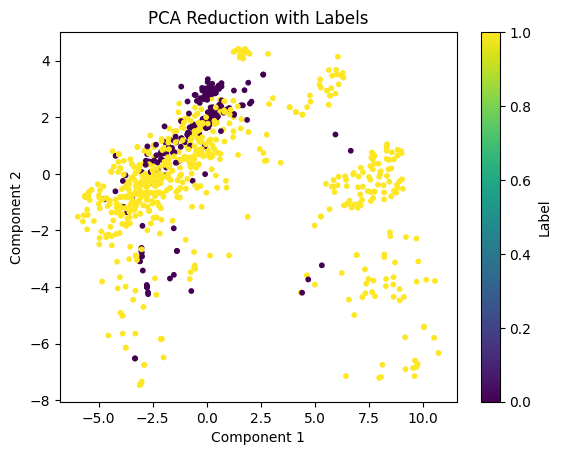

In [ ]:
# 시각화 (label을 색상으로 구분)
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', s=10)
plt.colorbar(label='Label')
plt.title('PCA Reduction with Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# PCA로 50차원 축소
pca = PCA(n_components=50, random_state=42)
reduced_embeddings = pca.fit_transform(final_embeddings)

print(f"Original Shape: {final_embeddings.shape}")  # (920, 1536)
print(f"Reduced Shape: {reduced_embeddings.shape}")  # (920, 50)

# Label 데이터에서 고유 클래스 수 계산
n_clusters = len(set(labels))  # label의 고유 값 개수

# K-means 군집화
kmeans = KMeans(4, random_state=42).fit(reduced_embeddings)
predicted_labels = kmeans.labels_

# ARI 및 NMI 계산
ari = adjusted_rand_score(labels, predicted_labels)
nmi = normalized_mutual_info_score(labels, predicted_labels)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")


Original Shape: torch.Size([920, 1536])
Reduced Shape: (920, 50)
Adjusted Rand Index (ARI): 0.04952804950062556
Normalized Mutual Information (NMI): 0.10859408134739418


In [ ]:
! pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
#import umap
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# # UMAP으로 50차원 축소
# umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=50, random_state=42)
# reduced_embeddings = umap_reducer.fit_transform(final_embeddings)

# DBSCAN 군집화
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(final_embeddings)
predicted_labels = dbscan.labels_

# ARI 및 NMI 계산
ari = adjusted_rand_score(labels, predicted_labels)
nmi = normalized_mutual_info_score(labels, predicted_labels)

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")


Adjusted Rand Index (ARI): -0.034867919233034735
Normalized Mutual Information (NMI): 0.027784351265766134


# BERT 이진 분류 (static 코드는 없는 버전)

**데이터 전처리 및 토큰화 함수 정의**

In [ ]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # HTML+CSS를 텍스트화
    df['HTML_CSS'] = df['HTML+CSS'].apply(lambda x: x if isinstance(x, str) else "")

    # 라벨 인코딩
    label_encoder = LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['다크패턴 여부'])
    # 다크패턴 여부 X -> 0
    # 다크패턴 여부 O -> 1

    # 'type' 컬럼도 라벨 인코딩, 이중 분류여서 사용은 안 함
    df['type_encoded'] = label_encoder.fit_transform(df['type'])

    # '추출한 텍스트'
    df['HTML_text'] = df['추출한 텍스트']
    return df[['HTML_CSS', 'HTML_text', 'label', 'type_encoded']]

# 전처리된 데이터
df_processed = preprocess_data(df_train)



In [ ]:
from transformers import BertTokenizer

# BERT의 기본 토크나이저를 로드
tokenizer = AutoTokenizer.from_pretrained("skt/kobert-base-v1")

# 토큰화 함수 정의 (HTML_CSS만 사용)
def tokenize_html_css(examples):
    return tokenizer(examples['HTML_CSS'], padding='max_length', truncation=True, max_length=256)

# 토큰화 함수 정의 (HTML_text만 사용)
def tokenize_html_text(examples):
    return tokenizer(examples['HTML_text'], padding='max_length', truncation=True, max_length=256)


**아래 코드가 토큰화하는 코드**

In [ ]:
from sklearn.model_selection import train_test_split
from datasets import Dataset


# 학습 데이터와 테스트 데이터 나누기
train_texts_html_css, test_texts_html_css, train_labels, test_labels, train_type_encodeds, test_type_encodeds, train_texts_html_text, test_texts_html_text = train_test_split(
    df_processed['HTML_CSS'].tolist(),
    df_processed['label'].tolist(),
    df_processed['type_encoded'].tolist(),
    df_processed['HTML_text'].tolist(),  # HTML_text도 포함
    test_size=0.2, random_state=42, stratify=df_processed['type_encoded']
)

# 데이터셋 생성
train_data = Dataset.from_dict({
    'HTML_CSS': train_texts_html_css,
    'HTML_text': train_texts_html_text,
    'label': train_labels,
    'type': train_type_encodeds
})

test_data = Dataset.from_dict({
    'HTML_CSS': test_texts_html_css,
    'HTML_text': test_texts_html_text,
    'label': test_labels,
    'type': test_type_encodeds
})

# 데이터셋에 각각의 토큰화 적용 (병렬 처리 활성화)
train_data_html_css = train_data.map(tokenize_html_css, batched=True, num_proc=4)
test_data_html_css = test_data.map(tokenize_html_css, batched=True, num_proc=4)

train_data_html_text = train_data.map(tokenize_html_text, batched=True, num_proc=4)
test_data_html_text = test_data.map(tokenize_html_text, batched=True, num_proc=4)

**아래 코드는 토큰화한 데이터 합치기(html+css, 추출한 텍스트)**

In [ ]:
from datasets import Dataset, concatenate_datasets

# 토큰화된 데이터셋 결합 함수 정의
def combine_datasets(dataset1, dataset2):
    combined_dataset = {
        'input_ids': [d1 + d2 for d1, d2 in zip(dataset1['input_ids'], dataset2['input_ids'])],
        'attention_mask': [m1 + m2 for m1, m2 in zip(dataset1['attention_mask'], dataset2['attention_mask'])],
        'label': dataset1['label'],  # 동일한 레이블 사용
        'type': dataset1['type']  # 'type'도 함께 결합
    }
    return Dataset.from_dict(combined_dataset)

# 결합된 학습 및 테스트 데이터 생성
combined_train_data = combine_datasets(train_data_html_css, train_data_html_text)
combined_test_data = combine_datasets(test_data_html_css, test_data_html_text)

**BERT 이중분류 학습하는 코드 + 성능 평가**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from transformers import Trainer, TrainingArguments, BertForSequenceClassification

# 평가 지표 계산 함수 정의
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='binary')
    roc_auc = roc_auc_score(labels, logits[:, 1])

    return {"accuracy": acc, "f1": f1, "roc_auc": roc_auc}

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# 훈련 설정, 하이퍼파라미터 튜닝 옵션
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    lr_scheduler_type="linear",
    report_to='none'
)


# Trainer 초기화
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=combined_train_data,
    eval_dataset=combined_test_data,
    compute_metrics=compute_metrics  # 평가 지표 계산 함수 추가
)

# 학습 시작
trainer.train()

# 모델 평가 후 시각화
# 평가 결과 얻기
eval_results = trainer.predict(combined_test_data)

# 실제 레이블(labels)과 예측 확률(probs) 추출
probs = eval_results.predictions[:, 1]
labels = eval_results.label_ids

# ROC 곡선과 AUC 계산
fpr, tpr, thresholds = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 정확도, F1 점수, AUC 출력
print(f"정확도 (Accuracy): {eval_results.metrics['test_accuracy']:.2f}")
print(f"F1 점수 (F1 Score): {eval_results.metrics['test_f1']:.2f}")
print(f"ROC-AUC (AUC Score): {eval_results.metrics['test_roc_auc']:.2f}")


# CodeBert (다중분류 + static 코드 없음)

텍스트와 코드를 분할하는 함수 정의
분할하는 이유는 CodeBERT 모델에서 입력 토큰의 최대 길이가 512개

In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer  # CodeBERT의 RoBERTa 기반 토크나이저

# CodeBERT 토크나이저 로드
tokenizer = RobertaTokenizer.from_pretrained("microsoft/codebert-base")

def split_text(text, max_length=256):
    """
    텍스트를 주어진 길이(max_length)로 분할하는 함수.
    """
    words = text.split()
    chunks = []
    chunk = ""

    for word in words:
        if len(chunk) + len(word) + 1 <= max_length:
            chunk += (" " + word if chunk else word)
        else:
            chunks.append(chunk)
            chunk = word
    if chunk:
        chunks.append(chunk)
    return chunks


def split_code(code, max_length=256):
    """
    코드도 텍스트와 비슷하게 분할하는 함수.
    """
    lines = code.split("\n")
    chunks = []
    chunk = ""

    for line in lines:
        if len(chunk) + len(line) + 1 <= max_length:
            chunk += (" " + line if chunk else line)
        else:
            chunks.append(chunk)
            chunk = line
    if chunk:
        chunks.append(chunk)
    return chunks


데이터 분할하는 함수

In [ ]:
def split_data(df, max_chunk_length=256):
    """
    DataFrame의 텍스트와 코드를 분할하는 함수.
    """
    split_text_data = []
    split_code_data = []
    labels = []

    # 라벨 인코더 생성
    label_encoder = LabelEncoder()
    df['type_encoded'] = label_encoder.fit_transform(df['type'])  # 'type' 컬럼을 숫자로 인코딩

    for idx, row in df.iterrows():
        text = row['추출한 텍스트']
        code = row['HTML+CSS']
        label = row['type_encoded']  # 라벨: type 컬럼

        # 텍스트와 코드 분할
        text_chunks = split_text(text, max_chunk_length)
        code_chunks = split_code(code, max_chunk_length)

        split_text_data.append(text_chunks)
        split_code_data.append(code_chunks)
        labels.append(label)

    return split_text_data, split_code_data, labels

split_text_data, split_code_data, labels = split_data(df_no_duplicates)

너무 데이터가 커서 코랩의 세션이 종료되는 데이터 제외

In [ ]:
# 20,000,000 이상인 데이터를 제외하고 따로 모으는 코드
excluded_data_indices = []
excluded_data = []  # 제외된 데이터를 저장할 리스트
remaining_split_text_data = []
remaining_split_code_data = []
remaining_labels = []

for idx, (text_chunks, code_chunks, label) in enumerate(zip(split_text_data, split_code_data, labels)):
    code_length = sum(len(chunk) for chunk in code_chunks)
    if code_length >= 20000000:
        # 데이터 제외
        excluded_data_indices.append(idx)
        excluded_data.append((text_chunks, code_chunks, label))
    else:
        # 남은 데이터로 저장
        remaining_split_text_data.append(text_chunks)
        remaining_split_code_data.append(code_chunks)
        remaining_labels.append(label)

# 결과 출력
print(f"Number of entries with code length >= 20,000,000: {len(excluded_data_indices)}")
print("Indices of excluded entries:", excluded_data_indices)


텍스트와 코드 데이터를 Input data 형식에 맞게 결합하는 코드

In [ ]:
def combine_chunks(split_text_data, split_code_data, labels, start_percent=0, end_percent=100):
    """
    분할된 텍스트와 코드 데이터를 합치는 함수.
    시작과 끝 인덱스를 기반으로 텍스트와 코드를 결합
    """
    combined_data = []
    total_data = len(split_text_data)

    # 시작 및 종료 인덱스 계산
    start_idx = int(total_data * (start_percent / 100))
    end_idx = int(total_data * (end_percent / 100))

    for idx, (text_chunks, code_chunks, label) in enumerate(zip(split_text_data[start_idx:end_idx],
                                                                split_code_data[start_idx:end_idx],
                                                                labels[start_idx:end_idx])):

        # 텍스트와 코드 결합
        combined_input = ""
        for text_chunk in text_chunks:
            for code_chunk in code_chunks:
                combined_input += f"[CLS] {text_chunk} [SEP] {code_chunk} [EOS] "

        combined_data.append((combined_input.strip(), label))

        # 진행 상황 표시: 10% 단위로 업데이트
        current_progress = int(((idx + 1) / (end_idx - start_idx)) * 100)
        if current_progress % 10 == 0:
            print(f"Combination progress: {current_progress}%")

    print(f"Combination completed for range {start_percent}% to {end_percent}%.")
    return combined_data

combined_remaining_data = combine_chunks(remaining_split_text_data, remaining_split_code_data, remaining_labels)

# 결과 출력
print(f"Total combined data for remaining entries: {len(combined_remaining_data)}")


아래 코드는 합친 데이터(텍스트 + 코드)를 토큰화함

In [ ]:
def tokenize_data_for_codebert(combined_data, max_length=512):
    """
    CodeBERT 모델을 위한 데이터를 토큰화하는 함수.
    """
    tokenized_inputs = []

    for idx, (combined_input, label) in enumerate(combined_data):
        # 텍스트 + 코드 결합 입력을 토큰화
        tokenized = tokenizer(
            combined_input,
            padding='max_length',
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )
        # 라벨도 함께 포함하여 저장
        tokenized_inputs.append((tokenized, label))

        # 진행 상황 표시
        if (idx + 1) % (len(combined_data) // 10) == 0:
            print(f"Tokenization progress: {((idx + 1) / len(combined_data)) * 100:.1f}%")

    print("Tokenization complete!")
    return tokenized_inputs

# combined_remaining_data에서 텍스트와 코드 합친 데이터를 토큰화
tokenized_data = tokenize_data_for_codebert(combined_remaining_data)


encoding한 라벨을 보기 쉽게 한글로 매핑하고 데이터 셋 분할

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
import numpy as np

# 라벨을 한국어로 매핑
label_mapping = {0: '다크패턴 아닌 데이터', 1: '방해형', 2: '압박형', 3: '오도형'}

# Tokenized 데이터를 처리할 Dataset 클래스 정의
class CodeBERTDataset(Dataset):
    def __init__(self, tokenized_data):
        self.tokenized_data = tokenized_data

    def __len__(self):
        return len(self.tokenized_data)

    def __getitem__(self, idx):
        tokenized_input, label = self.tokenized_data[idx]
        input_ids = tokenized_input['input_ids'].squeeze()
        attention_mask = tokenized_input['attention_mask'].squeeze()
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 토큰화된 데이터로 훈련 데이터와 테스트 데이터로 분할
train_tokenized, test_tokenized, train_labels, test_labels = train_test_split(
    tokenized_data, remaining_labels, test_size=0.2, stratify=remaining_labels
)

# Dataset 생성
train_dataset = CodeBERTDataset(train_tokenized)
test_dataset = CodeBERTDataset(test_tokenized)

아래 코드는 CodeBERT 모델 학습시키고 성능 평가

In [ ]:
# 모델과 훈련 파라미터 설정
model = RobertaForSequenceClassification.from_pretrained("microsoft/codebert-base", num_labels=4)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    learning_rate=2e-5,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    report_to='none'
)

# Trainer 객체 생성
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# 모델 학습
trainer.train()

# 평가 (테스트 데이터에 대한 예측 수행)
predictions, true_labels, metrics = trainer.predict(test_dataset)

# 예측 결과를 라벨로 변환 (0, 1, 2, 3 -> 한국어 라벨)
predicted_labels = [label_mapping[label] for label in predictions.argmax(axis=1)]
true_labels = [label_mapping[label] for label in true_labels]

# 전체 정확도 계산
correct_predictions = [pred == true for pred, true in zip(predicted_labels, true_labels)]
overall_accuracy = np.mean(correct_predictions)
print(f"전체 정확도: {overall_accuracy * 100:.2f}%")

# 각 클래스별 정확도 계산
class_correct_counts = {label: 0 for label in label_mapping.values()}
class_total_counts = {label: 0 for label in label_mapping.values()}

# 클래스별로 맞게 예측된 수 계산
for pred, true in zip(predicted_labels, true_labels):
    class_total_counts[true] += 1
    if pred == true:
        class_correct_counts[true] += 1

# 각 클래스별 정확도 출력
print("\n각 클래스별 정확도:")
for label in label_mapping.values():
    accuracy = (class_correct_counts[label] / class_total_counts[label]) * 100
    print(f"{label}: {accuracy:.2f}% ({class_correct_counts[label]}/{class_total_counts[label]}개 맞음)")

# classification_report 출력 (한국어 라벨로 출력)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=list(label_mapping.values())))

아래 코드는 테스트 데이터에서 각 유형별 수 계산
학습시키는 것과 관련 없음, 확인용 코드

In [ ]:
from collections import Counter

# 테스트 데이터 라벨에 대한 빈도 계산
test_label_counts = Counter(test_labels)

mapped_test_label_counts = {label_mapping[label]: count for label, count in test_label_counts.items()}

print("테스트 데이터에서 각 유형별 데이터 수:")
for label, count in mapped_test_label_counts.items():
    print(f"{label}: {count}개")
